In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [3]:
path = 'Work_to_be_Completed_ILBS'
pid = []
image_file = []
for fname in os.listdir(path):
    if fname.isdigit():
        pid.append(fname)
        for fname_ins in os.listdir(path+'\\'+fname):
            image_file.append(path+'\\'+fname+'\\'+fname_ins)

In [4]:
df_f = pd.DataFrame(image_file)

In [5]:
df_f[0][1].split('\\')[-2]

'00910'

In [6]:
df_label = pd.read_excel(path+'\\'+'HVPG value with CT images.xlsx')

In [7]:
df_label.head()

,ID,Date,HVPG
0,9109.0,2019-01-30,21.0
1,19699.0,2019-02-13,12.0
2,31322.0,2019-02-15,17.0
3,45341.0,2019-02-13,16.0
4,49565.0,2019-02-06,10.0


In [8]:
labels = []
for row in df_f.values.tolist():
    id_ = int(row[0].split('\\')[-2])
    if id_ == 910:
        id_ = 9109
    for rows in df_label.values.tolist():
        if id_==rows[0]:
            labels.append([row[0],rows[-1]])
           # print(label)
        #break
    #print(row,id_)
    #break

In [9]:
len(labels)

35011

In [10]:
len(df_f)

35011

In [11]:
df = pd.DataFrame(labels,columns=['path','label'])

In [12]:
df.head()

,path,label
0,Work_to_be_Completed_ILBS\00910\IMG-0005-00001...,21.0
1,Work_to_be_Completed_ILBS\00910\IMG-0005-00002...,21.0
2,Work_to_be_Completed_ILBS\00910\IMG-0005-00003...,21.0
3,Work_to_be_Completed_ILBS\00910\IMG-0005-00004...,21.0
4,Work_to_be_Completed_ILBS\00910\IMG-0005-00005...,21.0


In [13]:
from tensorflow import keras
#X = df['imarray'].values
y = np.array(df['label'])
y = keras.utils.to_categorical(y)

In [14]:
all_images = []
IMG_HEIGHT = IMG_WIDTH =150
for row in df['path']:
    image= cv2.imread( row, cv2.IMREAD_GRAYSCALE)
    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255
    #image = np.expand_dims(image, axis=0)
    all_images.append(image)

In [15]:
train_ = np.array(all_images)

In [16]:
train_.shape

(35011, 150, 150)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_,y,test_size=0.25)

In [18]:
X_train.shape

(26258, 150, 150)

In [19]:
X_train_t = np.expand_dims(X_train,axis=3)
X_test_t = np.expand_dims(X_test, axis=3)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(150, 150,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(28, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dense_1 (Dense)              (None, 28)                3612      
Total params: 43,677,724
Trainable params: 43,677,724
Non-trainable params: 0
____________________________________________

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_t, y_train,validation_split=0.1, batch_size=100, epochs=15, verbose=1)

Epoch 1/15
237/237 [==============================] - 36s 140ms/step - loss: 0.6070 - accuracy: 0.8586 - val_loss: 0.0292 - val_accuracy: 0.9886
Epoch 2/15
237/237 [==============================] - 28s 117ms/step - loss: 0.0322 - accuracy: 0.9890 - val_loss: 0.0280 - val_accuracy: 0.9882
Epoch 3/15
237/237 [==============================] - 32s 137ms/step - loss: 0.0269 - accuracy: 0.9885 - val_loss: 0.0240 - val_accuracy: 0.9874
Epoch 4/15
237/237 [==============================] - 32s 137ms/step - loss: 0.0204 - accuracy: 0.9896 - val_loss: 0.0281 - val_accuracy: 0.9897
Epoch 5/15
237/237 [==============================] - 32s 137ms/step - loss: 0.0194 - accuracy: 0.9894 - val_loss: 0.0185 - val_accuracy: 0.9871
Epoch 6/15
237/237 [==============================] - 33s 139ms/step - loss: 0.0176 - accuracy: 0.9886 - val_loss: 0.0181 - val_accuracy: 0.9859
Epoch 7/15
237/237 [==============================] - 33s 140ms/step - loss: 0.0181 - accuracy: 0.9893 - val_loss: 0.0217 - val_ac

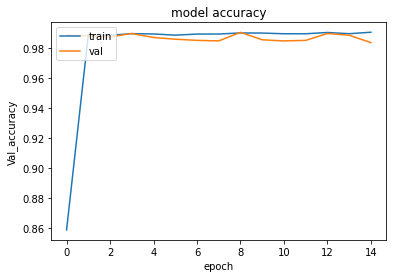

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

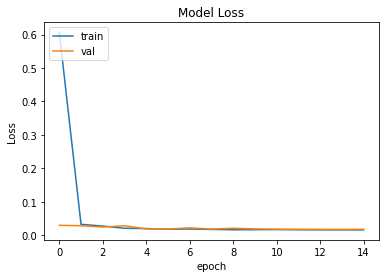

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
y_predict = model.predict(X_test_t)

In [30]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [32]:
y_test_e = np.argmax(y_test,axis=1).tolist()

In [35]:
score = model.evaluate(X_test_t, y_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
score = model.evaluate(X_train_t, y_train, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

274/274 [==============================] - 5s 18ms/step - loss: 0.0185 - accuracy: 0.9831
Test loss: 0.01849188655614853
Test accuracy: 0.9830915331840515
821/821 [==============================] - 15s 18ms/step - loss: 0.0150 - accuracy: 0.9908
Train loss: 0.014964485540986061
Train accuracy: 0.9908218383789062


In [34]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix
#print(confusion_matrix(y_test_e,y_predict_bool))

[[ 96   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0 186   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  65   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  99   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  95   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 172   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 916   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 530   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 356   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 